Taken from website:-
https://ourworldindata.org/coronavirus-source-data

Import libraries

In [1]:
import pandas as pd
import numpy as np

Read files

In [2]:
# load datasets
train = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57987,ZWE,Africa,Zimbabwe,2020-12-30,13625.0,300.0,138.429,360.0,1.0,4.286,916.710,20.184,9.314,24.221,0.067,0.288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2462.0,214577.0,14.437,0.166,1651.0,0.111,0.084,11.9,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57988,ZWE,Africa,Zimbabwe,2020-12-31,13867.0,242.0,154.429,363.0,3.0,3.429,932.993,16.282,10.390,24.423,0.202,0.231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57989,ZWE,Africa,Zimbabwe,2021-01-01,14084.0,217.0,172.000,369.0,6.0,4.000,947.593,14.600,11.572,24.827,0.404,0.269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57990,ZWE,Africa,Zimbabwe,2021-01-02,14491.0,407.0,218.286,377.0,8.0,5.143,974.976,27.384,14.687,25.365,0.538,0.346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57992 entries, 0 to 57991
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57660 non-null  object 
 1   continent                           57312 non-null  object 
 2   location                            57992 non-null  object 
 3   date                                57992 non-null  object 
 4   total_cases                         57435 non-null  float64
 5   new_cases                           57428 non-null  float64
 6   new_cases_smoothed                  56473 non-null  float64
 7   total_deaths                        49126 non-null  float64
 8   new_deaths                          49125 non-null  float64
 9   new_deaths_smoothed                 56473 non-null  float64
 10  total_cases_per_million             57103 non-null  float64
 11  new_cases_per_million               57096

In [4]:
country = "United States"

include_us = train[train['location'].values == country]
exclude_us = train[train['location'].values != country]
include_us

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
54851,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
54852,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
54853,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
54854,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
54855,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55194,USA,North America,United States,2020-12-30,19740772.0,229346.0,182041.143,342318.0,3750.0,2313.429,59639.318,692.883,549.969,1034.185,11.329,6.989,NaN,23069.0,69.694,125220.0,378.305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2794588.0,0.84,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
55195,USA,North America,United States,2020-12-31,19968087.0,227315.0,186106.286,345737.0,3419.0,2387.714,60326.064,686.747,562.250,1044.514,10.329,7.214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
55196,USA,North America,United States,2021-01-01,20128693.0,160606.0,194737.714,347788.0,2051.0,2506.000,60811.275,485.211,588.327,1050.711,6.196,7.571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
55197,USA,North America,United States,2021-01-02,20426184.0,297491.0,204865.429,350186.0,2398.0,2611.000,61710.032,898.757,618.924,1057.955,7.245,7.888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4225756.0,1.28,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924


In [5]:
us_newdeath = pd.DataFrame({'date':include_us.date , 'new_cases': include_us.new_cases, 'new_deaths': include_us.new_deaths}).reset_index()
us_newdeath

,index,date,new_cases,new_deaths
0,54851,2020-01-22,NaN,NaN
1,54852,2020-01-23,0.0,NaN
2,54853,2020-01-24,1.0,NaN
3,54854,2020-01-25,0.0,NaN
4,54855,2020-01-26,3.0,NaN
...,...,...,...,...
343,55194,2020-12-30,229346.0,3750.0
344,55195,2020-12-31,227315.0,3419.0
345,55196,2021-01-01,160606.0,2051.0
346,55197,2021-01-02,297491.0,2398.0


Rename columns

In [6]:
us_newdeath.rename(columns={'date':'ds', 'new_cases': 'add1','new_deaths': 'y'}, inplace=True)
us_newdeath

,index,ds,add1,y
0,54851,2020-01-22,NaN,NaN
1,54852,2020-01-23,0.0,NaN
2,54853,2020-01-24,1.0,NaN
3,54854,2020-01-25,0.0,NaN
4,54855,2020-01-26,3.0,NaN
...,...,...,...,...
343,55194,2020-12-30,229346.0,3750.0
344,55195,2020-12-31,227315.0,3419.0
345,55196,2021-01-01,160606.0,2051.0
346,55197,2021-01-02,297491.0,2398.0


Graph time series

Text(0, 0.5, 'y')

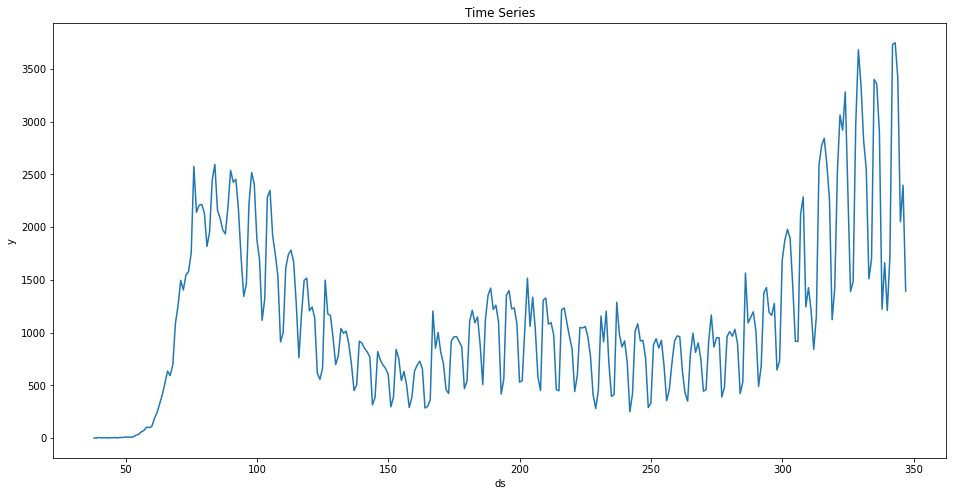

In [7]:
import matplotlib.pyplot as plt

us_newdeath['y'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("ds") 
plt.ylabel("y")

Check for null values

In [8]:
us_newdeath.isnull().sum()

index     0
ds        0
add1      1
y        38
dtype: int64

In [9]:
us_newdeath.fillna(0, inplace=True)
us_newdeath.isnull().sum().sum()

0

Split time series

In [10]:
month = '2021-02'

test = pd.DataFrame({
    'date': pd.date_range(
        start = pd.Timestamp(month),                        
        end = pd.Timestamp(month) + pd.offsets.MonthEnd(0),
        freq = 'D'
    )
})
test

,date
0,2021-02-01
1,2021-02-02
2,2021-02-03
3,2021-02-04
4,2021-02-05
5,2021-02-06
6,2021-02-07
7,2021-02-08
8,2021-02-09
9,2021-02-10


In [11]:
test['new_case'] = us_newdeath.add1.max()
test

,date,new_case
0,2021-02-01,297491.0
1,2021-02-02,297491.0
2,2021-02-03,297491.0
3,2021-02-04,297491.0
4,2021-02-05,297491.0
5,2021-02-06,297491.0
6,2021-02-07,297491.0
7,2021-02-08,297491.0
8,2021-02-09,297491.0
9,2021-02-10,297491.0


In [12]:
test.rename(columns={'date':'ds', 'new_case': 'add1'}, inplace=True)
test

,ds,add1
0,2021-02-01,297491.0
1,2021-02-02,297491.0
2,2021-02-03,297491.0
3,2021-02-04,297491.0
4,2021-02-05,297491.0
5,2021-02-06,297491.0
6,2021-02-07,297491.0
7,2021-02-08,297491.0
8,2021-02-09,297491.0
9,2021-02-10,297491.0


In [13]:
X_train = us_newdeath.loc[us_newdeath["ds"]<"2020-12-15"]
X_val  = us_newdeath.loc[us_newdeath["ds"]>="2020-12-15"]
X_test = test.loc[test["ds"]>="2021-02-01"]

FB Prophet

In [14]:
from fbprophet import Prophet

model = Prophet()
model.add_regressor('add1')
model.fit(X_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict on validation set

In [15]:
forecast = model.predict(X_val.drop(columns="y"))
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-15,175.381387,1569.507040,2534.854114,175.381387,175.381387,1686.655546,1686.655546,1686.655546,1878.582207,1878.582207,1878.582207,1686.655546,1686.655546,1686.655546,191.926661,191.926661,191.926661,0.0,0.0,0.0,2053.963594
1,2020-12-16,169.336614,2135.124192,3206.671952,169.336614,169.336614,2255.200150,2255.200150,2255.200150,2499.456820,2499.456820,2499.456820,2255.200150,2255.200150,2255.200150,244.256670,244.256670,244.256670,0.0,0.0,0.0,2668.793433
2,2020-12-17,163.291840,1886.513877,2899.646048,163.236970,163.291840,2142.625700,2142.625700,2142.625700,2251.710825,2251.710825,2251.710825,2142.625700,2142.625700,2142.625700,109.085125,109.085125,109.085125,0.0,0.0,0.0,2415.002665
3,2020-12-18,157.247066,1971.362626,3025.299535,156.828927,157.418879,2287.810456,2287.810456,2287.810456,2334.953197,2334.953197,2334.953197,2287.810456,2287.810456,2287.810456,47.142742,47.142742,47.142742,0.0,0.0,0.0,2492.200263
4,2020-12-19,151.202293,1276.157140,2288.295772,150.250979,151.842171,1676.700217,1676.700217,1676.700217,1627.394603,1627.394603,1627.394603,1676.700217,1676.700217,1676.700217,-49.305613,-49.305613,-49.305613,0.0,0.0,0.0,1778.596896
5,2020-12-20,145.157519,909.425114,1970.233930,143.543656,146.348707,1584.886131,1584.886131,1584.886131,1280.228210,1280.228210,1280.228210,1584.886131,1584.886131,1584.886131,-304.657921,-304.657921,-304.657921,0.0,0.0,0.0,1425.385729
6,2020-12-21,139.112745,1004.527784,1994.828305,136.867490,141.039905,1617.840912,1617.840912,1617.840912,1379.393249,1379.393249,1379.393249,1617.840912,1617.840912,1617.840912,-238.447662,-238.447662,-238.447662,0.0,0.0,0.0,1518.505995
7,2020-12-22,133.067972,1504.314963,2465.219226,129.989379,135.835636,1656.801041,1656.801041,1656.801041,1848.727702,1848.727702,1848.727702,1656.801041,1656.801041,1656.801041,191.926661,191.926661,191.926661,0.0,0.0,0.0,1981.795673
8,2020-12-23,127.023198,1855.144182,2905.784241,122.855923,130.563420,2024.424825,2024.424825,2024.424825,2268.681495,2268.681495,2268.681495,2024.424825,2024.424825,2024.424825,244.256670,244.256670,244.256670,0.0,0.0,0.0,2395.704693
9,2020-12-24,120.978425,1414.684180,2421.562173,115.981415,125.294621,1704.441942,1704.441942,1704.441942,1813.527066,1813.527066,1813.527066,1704.441942,1704.441942,1704.441942,109.085125,109.085125,109.085125,0.0,0.0,0.0,1934.505491


In [16]:
# Calculating the RMSE of the model
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(X_val['y'], forecast['yhat'])) 
print(rms)

867.2906276680955


In [17]:
forecast.yhat[forecast.yhat < 0] = 0

df_val=pd.DataFrame({'actual': X_val.y.values, 'predicted': forecast.yhat.values.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,actual,predicted
0,2984.0,2053
1,3682.0,2668
2,3346.0,2415
3,2821.0,2492
4,2549.0,1778
5,1509.0,1425
6,1696.0,1518
7,3401.0,1981
8,3359.0,2395
9,2899.0,1934


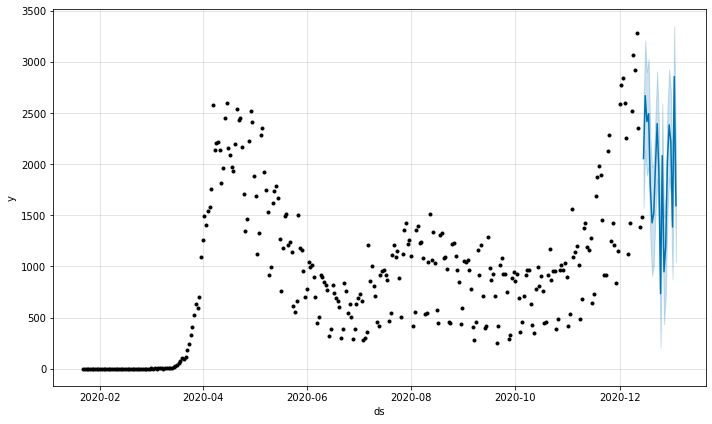

In [18]:
fig1 = model.plot(forecast)

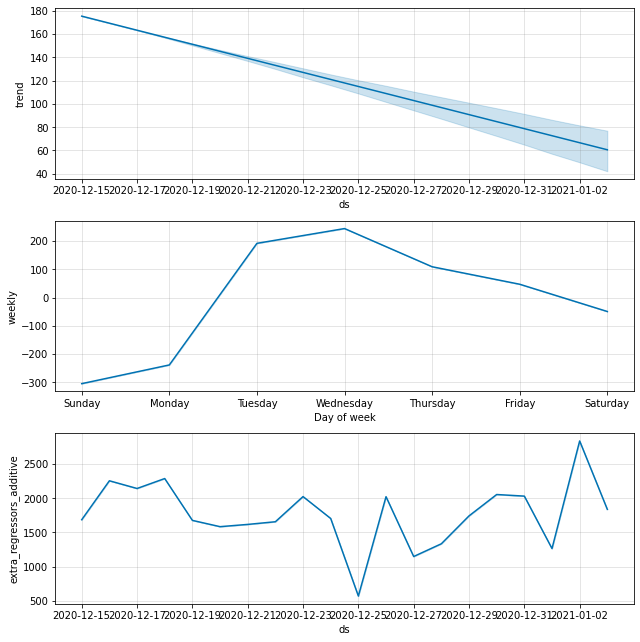

In [19]:
fig2 = model.plot_components(forecast)

In [20]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [21]:
plot_components_plotly(model, forecast)

Predict on test set

In [22]:
prediction = model.predict(X_test)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-01,-114.767747,1973.135087,3003.594476,-189.490022,-39.659947,2836.984078,2836.984078,2836.984078,2598.536416,2598.536416,2598.536416,2836.984078,2836.984078,2836.984078,-238.447662,-238.447662,-238.447662,0.0,0.0,0.0,2483.768669
1,2021-02-02,-120.812520,2427.894834,3428.390984,-197.332552,-43.377699,2836.984078,2836.984078,2836.984078,3028.910739,3028.910739,3028.910739,2836.984078,2836.984078,2836.984078,191.926661,191.926661,191.926661,0.0,0.0,0.0,2908.098219
2,2021-02-03,-126.857294,2430.190690,3478.428684,-206.425481,-46.529740,2836.984078,2836.984078,2836.984078,3081.240748,3081.240748,3081.240748,2836.984078,2836.984078,2836.984078,244.256670,244.256670,244.256670,0.0,0.0,0.0,2954.383454
3,2021-02-04,-132.902068,2253.794068,3315.633881,-214.460087,-49.616292,2836.984078,2836.984078,2836.984078,2946.069203,2946.069203,2946.069203,2836.984078,2836.984078,2836.984078,109.085125,109.085125,109.085125,0.0,0.0,0.0,2813.167135
4,2021-02-05,-138.946841,2236.155417,3277.465932,-222.888284,-53.718293,2836.984078,2836.984078,2836.984078,2884.126820,2884.126820,2884.126820,2836.984078,2836.984078,2836.984078,47.142742,47.142742,47.142742,0.0,0.0,0.0,2745.179979
5,2021-02-06,-144.991615,2115.446325,3126.787026,-231.059427,-56.880807,2836.984078,2836.984078,2836.984078,2787.678465,2787.678465,2787.678465,2836.984078,2836.984078,2836.984078,-49.305613,-49.305613,-49.305613,0.0,0.0,0.0,2642.686850
6,2021-02-07,-151.036389,1888.747768,2932.765050,-239.427356,-60.356879,2836.984078,2836.984078,2836.984078,2532.326157,2532.326157,2532.326157,2836.984078,2836.984078,2836.984078,-304.657921,-304.657921,-304.657921,0.0,0.0,0.0,2381.289769
7,2021-02-08,-157.081162,1951.946983,2970.302765,-247.721501,-64.291278,2836.984078,2836.984078,2836.984078,2598.536416,2598.536416,2598.536416,2836.984078,2836.984078,2836.984078,-238.447662,-238.447662,-238.447662,0.0,0.0,0.0,2441.455254
8,2021-02-09,-163.125936,2343.415978,3347.321140,-256.066485,-68.139717,2836.984078,2836.984078,2836.984078,3028.910739,3028.910739,3028.910739,2836.984078,2836.984078,2836.984078,191.926661,191.926661,191.926661,0.0,0.0,0.0,2865.784803
9,2021-02-10,-169.170709,2373.885950,3456.078913,-264.174669,-72.203577,2836.984078,2836.984078,2836.984078,3081.240748,3081.240748,3081.240748,2836.984078,2836.984078,2836.984078,244.256670,244.256670,244.256670,0.0,0.0,0.0,2912.070039


In [23]:
prediction.yhat[prediction.yhat < 0] = 0

output = pd.DataFrame({'date': test.ds, 'new_death': prediction.yhat.values.astype(int)})
output.to_csv('p_new_death.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
#upload submission
p_new_death = pd.read_csv("p_new_death.csv")
p_new_death

,date,new_death
0,2021-02-01,2483
1,2021-02-02,2908
2,2021-02-03,2954
3,2021-02-04,2813
4,2021-02-05,2745
5,2021-02-06,2642
6,2021-02-07,2381
7,2021-02-08,2441
8,2021-02-09,2865
9,2021-02-10,2912


In [25]:
df_out = forecast.append(prediction)
df_out

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-15,175.381387,1569.507040,2534.854114,175.381387,175.381387,1686.655546,1686.655546,1686.655546,1878.582207,1878.582207,1878.582207,1686.655546,1686.655546,1686.655546,191.926661,191.926661,191.926661,0.0,0.0,0.0,2053.963594
1,2020-12-16,169.336614,2135.124192,3206.671952,169.336614,169.336614,2255.200150,2255.200150,2255.200150,2499.456820,2499.456820,2499.456820,2255.200150,2255.200150,2255.200150,244.256670,244.256670,244.256670,0.0,0.0,0.0,2668.793433
2,2020-12-17,163.291840,1886.513877,2899.646048,163.236970,163.291840,2142.625700,2142.625700,2142.625700,2251.710825,2251.710825,2251.710825,2142.625700,2142.625700,2142.625700,109.085125,109.085125,109.085125,0.0,0.0,0.0,2415.002665
3,2020-12-18,157.247066,1971.362626,3025.299535,156.828927,157.418879,2287.810456,2287.810456,2287.810456,2334.953197,2334.953197,2334.953197,2287.810456,2287.810456,2287.810456,47.142742,47.142742,47.142742,0.0,0.0,0.0,2492.200263
4,2020-12-19,151.202293,1276.157140,2288.295772,150.250979,151.842171,1676.700217,1676.700217,1676.700217,1627.394603,1627.394603,1627.394603,1676.700217,1676.700217,1676.700217,-49.305613,-49.305613,-49.305613,0.0,0.0,0.0,1778.596896
5,2020-12-20,145.157519,909.425114,1970.233930,143.543656,146.348707,1584.886131,1584.886131,1584.886131,1280.228210,1280.228210,1280.228210,1584.886131,1584.886131,1584.886131,-304.657921,-304.657921,-304.657921,0.0,0.0,0.0,1425.385729
6,2020-12-21,139.112745,1004.527784,1994.828305,136.867490,141.039905,1617.840912,1617.840912,1617.840912,1379.393249,1379.393249,1379.393249,1617.840912,1617.840912,1617.840912,-238.447662,-238.447662,-238.447662,0.0,0.0,0.0,1518.505995
7,2020-12-22,133.067972,1504.314963,2465.219226,129.989379,135.835636,1656.801041,1656.801041,1656.801041,1848.727702,1848.727702,1848.727702,1656.801041,1656.801041,1656.801041,191.926661,191.926661,191.926661,0.0,0.0,0.0,1981.795673
8,2020-12-23,127.023198,1855.144182,2905.784241,122.855923,130.563420,2024.424825,2024.424825,2024.424825,2268.681495,2268.681495,2268.681495,2024.424825,2024.424825,2024.424825,244.256670,244.256670,244.256670,0.0,0.0,0.0,2395.704693
9,2020-12-24,120.978425,1414.684180,2421.562173,115.981415,125.294621,1704.441942,1704.441942,1704.441942,1813.527066,1813.527066,1813.527066,1704.441942,1704.441942,1704.441942,109.085125,109.085125,109.085125,0.0,0.0,0.0,1934.505491


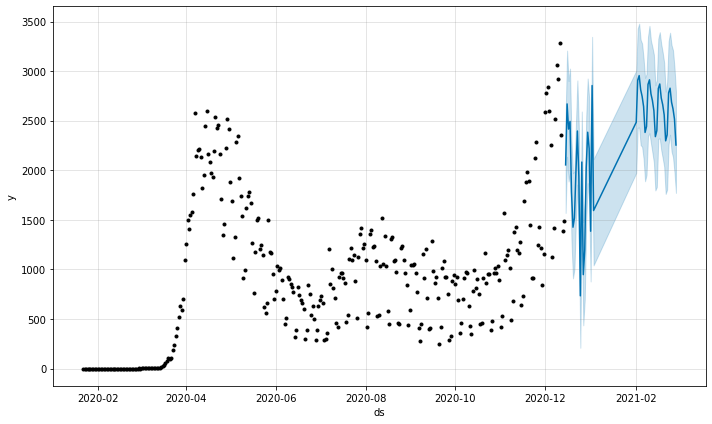

In [26]:
fig1 = model.plot(df_out)

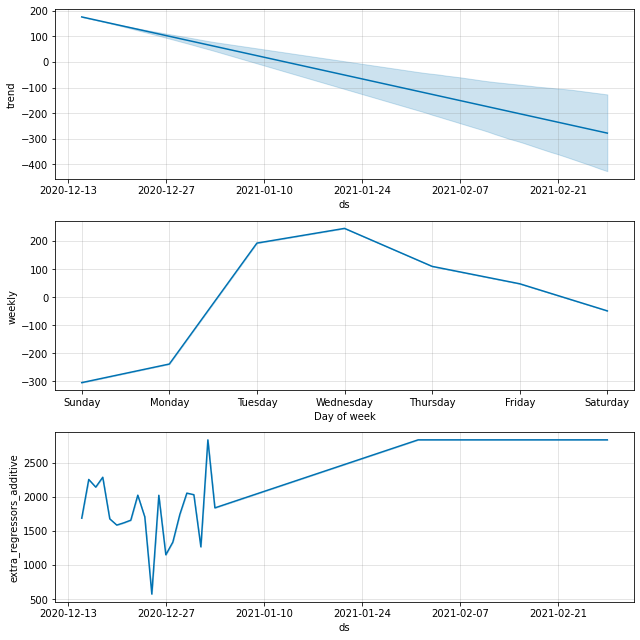

In [27]:
fig2 = model.plot_components(df_out)

In [28]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, df_out)

In [29]:
plot_components_plotly(model, df_out)

Statsmodels

Naive approach

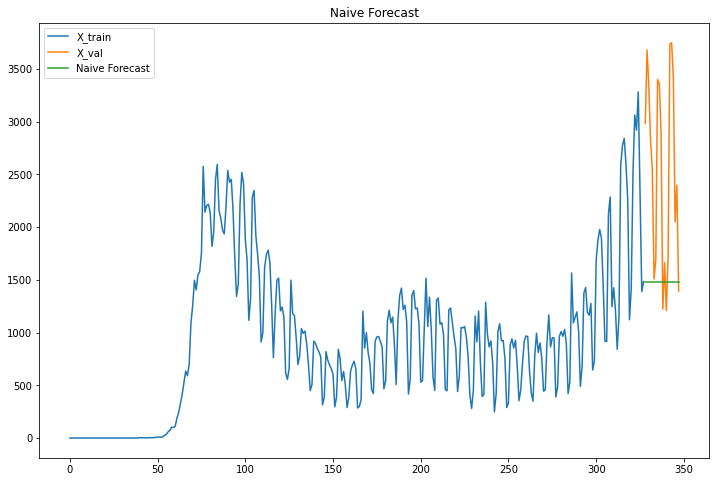

In [30]:
#naive approach
dd= np.asarray(X_train.y) 
y_hat = X_val.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [31]:
y_hat

,index,ds,add1,y,naive
328,55179,2020-12-15,197310.0,2984.0,1484.0
329,55180,2020-12-16,246824.0,3682.0,1484.0
330,55181,2020-12-17,237020.0,3346.0,1484.0
331,55182,2020-12-18,249664.0,2821.0,1484.0
332,55183,2020-12-19,196443.0,2549.0,1484.0
333,55184,2020-12-20,188447.0,1509.0,1484.0
334,55185,2020-12-21,191317.0,1696.0,1484.0
335,55186,2020-12-22,194710.0,3401.0,1484.0
336,55187,2020-12-23,226726.0,3359.0,1484.0
337,55188,2020-12-24,198859.0,2899.0,1484.0


In [32]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(X_val.y, y_hat.naive)) 
print(rms)

1379.0642298312287


Moving Average

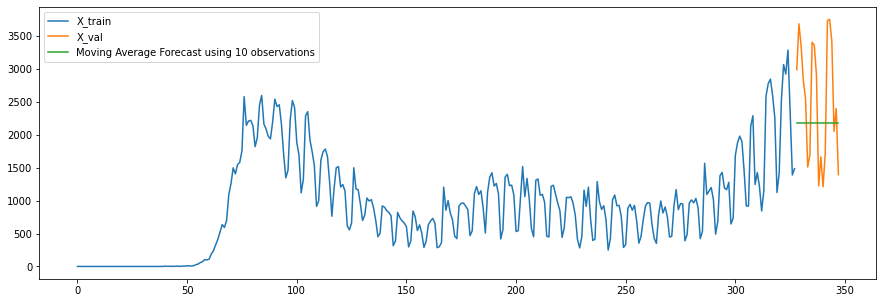

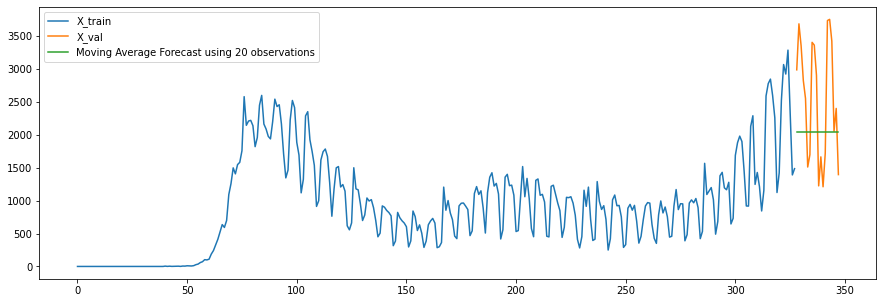

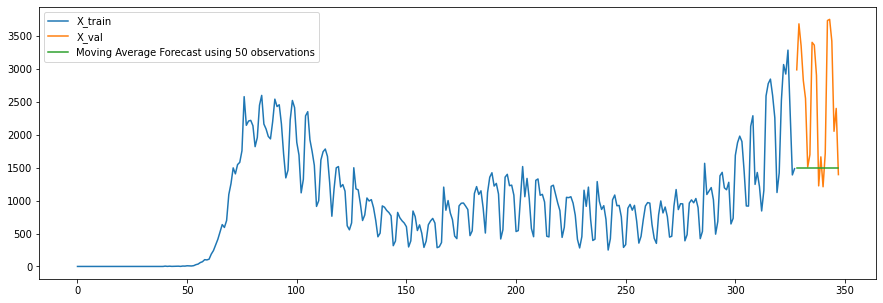

In [33]:
#moving average
# Considering rolling mean for last 10, 20, 50 days and visualize the results.
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [34]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, y_hat_avg.moving_avg_forecast)) 
print(rms)

1368.0673923458594


In [35]:
train = X_train.append(X_val)
train

,index,ds,add1,y
0,54851,2020-01-22,0.0,0.0
1,54852,2020-01-23,0.0,0.0
2,54853,2020-01-24,1.0,0.0
3,54854,2020-01-25,0.0,0.0
4,54855,2020-01-26,3.0,0.0
...,...,...,...,...
343,55194,2020-12-30,229346.0,3750.0
344,55195,2020-12-31,227315.0,3419.0
345,55196,2021-01-01,160606.0,2051.0
346,55197,2021-01-02,297491.0,2398.0


In [36]:
#predict on X_test
y_hat_avg = X_test.copy()
y_hat_avg['moving_avg_forecast'] = train['y'].rolling(50).mean().iloc[-1] # average of last 50 observations
y_hat_avg

,ds,add1,moving_avg_forecast
0,2021-02-01,297491.0,2116.08
1,2021-02-02,297491.0,2116.08
2,2021-02-03,297491.0,2116.08
3,2021-02-04,297491.0,2116.08
4,2021-02-05,297491.0,2116.08
5,2021-02-06,297491.0,2116.08
6,2021-02-07,297491.0,2116.08
7,2021-02-08,297491.0,2116.08
8,2021-02-09,297491.0,2116.08
9,2021-02-10,297491.0,2116.08


In [37]:
X_val.index.max()

347

In [38]:
list_num = []
index = X_val.index.max()
for i in range(len(X_test)):
  index = index + 1
  list_num.append(index)
list_num

[348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375]

In [39]:
X_test['index'] = list_num
X_test

,ds,add1,index
0,2021-02-01,297491.0,348
1,2021-02-02,297491.0,349
2,2021-02-03,297491.0,350
3,2021-02-04,297491.0,351
4,2021-02-05,297491.0,352
5,2021-02-06,297491.0,353
6,2021-02-07,297491.0,354
7,2021-02-08,297491.0,355
8,2021-02-09,297491.0,356
9,2021-02-10,297491.0,357


In [40]:
y_hat_avg['index'] = list_num
y_hat_avg

,ds,add1,moving_avg_forecast,index
0,2021-02-01,297491.0,2116.08,348
1,2021-02-02,297491.0,2116.08,349
2,2021-02-03,297491.0,2116.08,350
3,2021-02-04,297491.0,2116.08,351
4,2021-02-05,297491.0,2116.08,352
5,2021-02-06,297491.0,2116.08,353
6,2021-02-07,297491.0,2116.08,354
7,2021-02-08,297491.0,2116.08,355
8,2021-02-09,297491.0,2116.08,356
9,2021-02-10,297491.0,2116.08,357


In [41]:
y_hat_avg.set_index(['index'], inplace=True)
y_hat_avg

,ds,add1,moving_avg_forecast
index,,,
348,2021-02-01,297491.0,2116.08
349,2021-02-02,297491.0,2116.08
350,2021-02-03,297491.0,2116.08
351,2021-02-04,297491.0,2116.08
352,2021-02-05,297491.0,2116.08
353,2021-02-06,297491.0,2116.08
354,2021-02-07,297491.0,2116.08
355,2021-02-08,297491.0,2116.08
356,2021-02-09,297491.0,2116.08


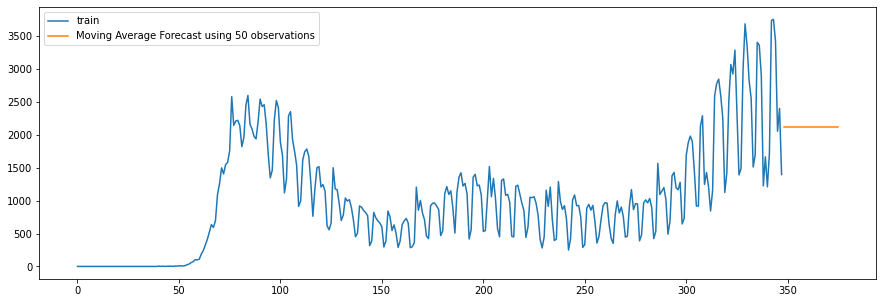

In [42]:
plt.figure(figsize=(15,5)) 
plt.plot(train['y'], label='train') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [43]:
#select last column from array
y_hat_avg.iloc[:,-1:] = y_hat_avg.iloc[:,-1:].astype(int)
print(y_hat_avg.iloc[:,-1:])

       moving_avg_forecast
index                     
348                   2116
349                   2116
350                   2116
351                   2116
352                   2116
353                   2116
354                   2116
355                   2116
356                   2116
357                   2116
358                   2116
359                   2116
360                   2116
361                   2116
362                   2116
363                   2116
364                   2116
365                   2116
366                   2116
367                   2116
368                   2116
369                   2116
370                   2116
371                   2116
372                   2116
373                   2116
374                   2116
375                   2116


In [44]:
prediction = y_hat_avg.moving_avg_forecast

prediction[prediction < 0] = 0

output = pd.DataFrame({'date': test.ds, 'new_death': prediction.values.astype(int)})
output.to_csv('p_new_death.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
#upload submission
p_new_death = pd.read_csv("p_new_death.csv")
p_new_death

,date,new_death
0,2021-02-01,2116
1,2021-02-02,2116
2,2021-02-03,2116
3,2021-02-04,2116
4,2021-02-05,2116
5,2021-02-06,2116
6,2021-02-07,2116
7,2021-02-08,2116
8,2021-02-09,2116
9,2021-02-10,2116


Vector Auto Regression VAR

In [46]:
X_train = X_train.drop(['ds'],axis=1)
X_train

,index,add1,y
0,54851,0.0,0.0
1,54852,0.0,0.0
2,54853,1.0,0.0
3,54854,0.0,0.0
4,54855,3.0,0.0
...,...,...,...
323,55174,227604.0,2920.0
324,55175,234683.0,3283.0
325,55176,219248.0,2354.0
326,55177,191741.0,1389.0


In [47]:
X_train.fillna(0,inplace=True)
X_train

,index,add1,y
0,54851,0.0,0.0
1,54852,0.0,0.0
2,54853,1.0,0.0
3,54854,0.0,0.0
4,54855,3.0,0.0
...,...,...,...
323,55174,227604.0,2920.0
324,55175,234683.0,3283.0
325,55176,219248.0,2354.0
326,55177,191741.0,1389.0


In [48]:
X_val = X_val.drop(['ds'],axis=1)
X_val

,index,add1,y
328,55179,197310.0,2984.0
329,55180,246824.0,3682.0
330,55181,237020.0,3346.0
331,55182,249664.0,2821.0
332,55183,196443.0,2549.0
333,55184,188447.0,1509.0
334,55185,191317.0,1696.0
335,55186,194710.0,3401.0
336,55187,226726.0,3359.0
337,55188,198859.0,2899.0


In [49]:
X_test = X_test.drop(['ds'],axis=1)
X_test

,add1,index
0,297491.0,348
1,297491.0,349
2,297491.0,350
3,297491.0,351
4,297491.0,352
5,297491.0,353
6,297491.0,354
7,297491.0,355
8,297491.0,356
9,297491.0,357


In [50]:
from statsmodels.tsa.vector_ar.var_model import VAR

start_index = X_val.index.min()
end_index = X_val.index.max()

# fit model
model = VAR(X_train)
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.y, steps=len(X_val))
yhat = yhat.astype(int)
print(yhat)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



[[ 55178 191943   1483]
 [ 55179 190371   1482]
 [ 55180 188892   1482]
 [ 55181 187504   1481]
 [ 55182 186201   1481]
 [ 55183 184980   1481]
 [ 55184 183838   1480]
 [ 55185 182771   1480]
 [ 55186 181776   1480]
 [ 55187 180849   1480]
 [ 55188 179989   1481]
 [ 55189 179191   1481]
 [ 55190 178453   1481]
 [ 55191 177772   1482]
 [ 55192 177147   1483]
 [ 55193 176574   1483]
 [ 55194 176051   1484]
 [ 55195 175576   1485]
 [ 55196 175147   1486]
 [ 55197 174762   1487]]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning:

y is a deprecated alias for endog, will be removed in version 0.11.0



In [51]:
index = yhat[:,0]

In [52]:
y_pred = yhat[:,2]

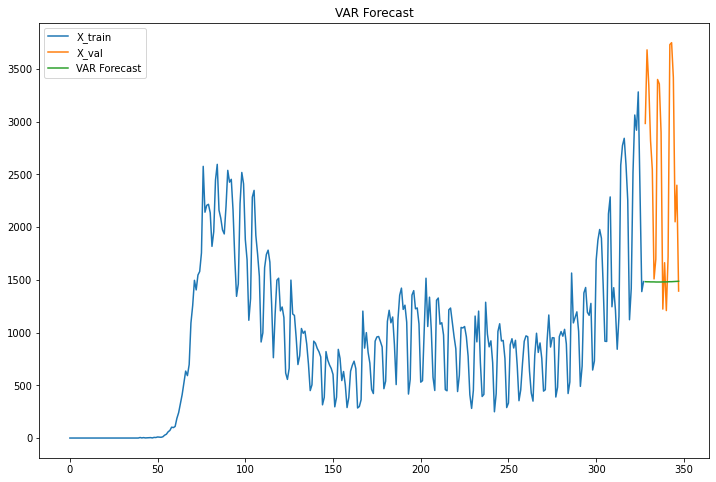

In [53]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(X_val.index,y_pred, label='VAR Forecast') 
plt.legend(loc='best') 
plt.title("VAR Forecast") 
plt.show()

In [54]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, y_pred)) 
print(rms)

1380.5295360838898


Vector Moving Average

In [55]:
from statsmodels.tsa.statespace.varmax import VARMAX

model = VARMAX(X_train, order=(0,1))
model_fit = model.fit(disp=False)
yhat = model_fit.forecast(steps=len(X_val))
yhat = yhat.astype(int)
yhat

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:379: UserWarning:

Non-stationary starting moving-average parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



,index,add1,y
328,55180,45315,-2628
329,55014,50420,917
330,55014,50420,917
331,55014,50420,917
332,55014,50420,917
333,55014,50420,917
334,55014,50420,917
335,55014,50420,917
336,55014,50420,917
337,55014,50420,917


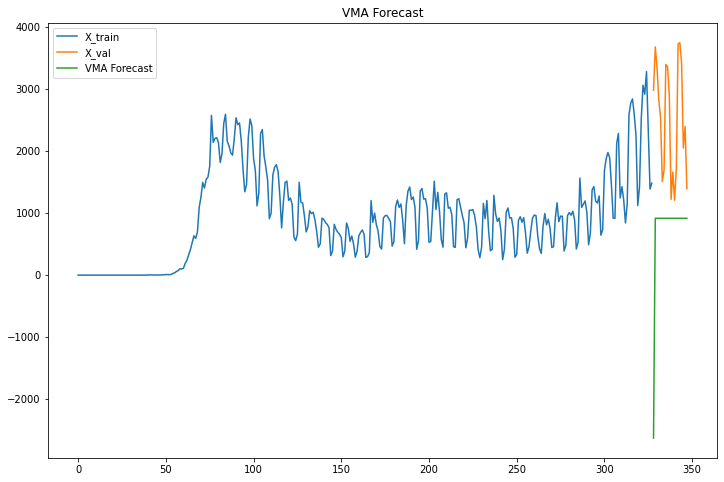

In [56]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(X_val.index,yhat.y, label='VMA Forecast') 
plt.legend(loc='best') 
plt.title("VMA Forecast") 
plt.show()

In [57]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, yhat.y)) 
print(rms)

2186.7976586780956


Vector Autoregression Moving-Average (VARMA)

In [58]:
from statsmodels.tsa.statespace.varmax import VARMAX

# fit model
model = VARMAX(X_train, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast(steps=len(X_val))
yhat = yhat.astype(int)
print(yhat)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:379: UserWarning:

Non-stationary starting moving-average parameters found. Using zeros as starting parameters.



     index   add1     y
328  55180  45315 -2628
329  55014  50420   917
330  55014  50420   917
331  55014  50420   917
332  55014  50420   917
333  55014  50420   917
334  55014  50420   917
335  55014  50420   917
336  55014  50420   917
337  55014  50420   917
338  55014  50420   917
339  55014  50420   917
340  55014  50420   917
341  55014  50420   917
342  55014  50420   917
343  55014  50420   917
344  55014  50420   917
345  55014  50420   917
346  55014  50420   917
347  55014  50420   917


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



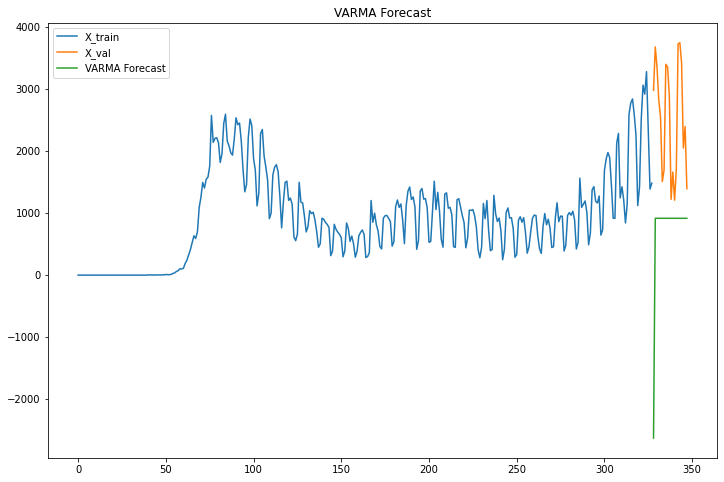

In [59]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(X_val.index,yhat.y, label='VARMA Forecast') 
plt.legend(loc='best') 
plt.title("VARMA Forecast") 
plt.show()

In [60]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, yhat.y)) 
print(rms)

2186.7976586780956
